In [377]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Project
## FPS Video Games Analysis

In [378]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\first_person_shooter.csv")

# Data Info 

In [379]:
df.columns

Index(['Title', 'Developer', 'Platform', 'Release_Date'], dtype='object')

In [380]:
df.shape

(867, 4)

In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         867 non-null    object
 1   Developer     867 non-null    object
 2   Platform      867 non-null    object
 3   Release_Date  867 non-null    object
dtypes: object(4)
memory usage: 27.2+ KB


In [382]:
df.head()

,Title,Developer,Platform,Release_Date
0,007: Agent Under Fire,"EA Redwood Shores, EA Canada","PS2, Xbox, GCN",2001-11-13
1,007: Nightfire,"Eurocom, Gearbox Software","WIN, PS2, Xbox, GCN, GBA, OSX",2002-11-19
2,007: Quantum of Solace,"Treyarch, Beenox","WIN, PS3, X360, Wii",2008-10-31
3,007 Legends,Eurocom,"WIN, PS3, X360, WiiU",2012-10-16
4,3D Monster Chase,Romik,"AMSCPC, ZX",1984


# Data Handling & Cleaning 

In [383]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [384]:
def clean_date(val):
    val=str(val).strip()
    if "-" in val:
        return val
    elif val.isdigit() and len(val)==4:
        return f"{val}-01-01"
    else:
        pd.NaT
df['Release_Date_Clean'] = df['Release_Date'].apply(clean_date)
df['Release_Date_Clean'] = pd.to_datetime(df['Release_Date_Clean'], errors='coerce')
df['Release_Year'] = df['Release_Date_Clean'].dt.year
df['Release_Year'] = df['Release_Year'].fillna(0).astype(int)
df.drop(columns=["Release_Date","Release_Date_Clean"],inplace=True)

In [385]:
df.head()

,Title,Developer,Platform,Release_Year
0,007: Agent Under Fire,"EA Redwood Shores, EA Canada","PS2, Xbox, GCN",2001
1,007: Nightfire,"Eurocom, Gearbox Software","WIN, PS2, Xbox, GCN, GBA, OSX",2002
2,007: Quantum of Solace,"Treyarch, Beenox","WIN, PS3, X360, Wii",2008
3,007 Legends,Eurocom,"WIN, PS3, X360, WiiU",2012
4,3D Monster Chase,Romik,"AMSCPC, ZX",1984


In [386]:
# Split platform strings into lists
df['Platform_List'] = df['Platform'].str.split(',\s*')

# Create row per platform
df_ex = df.explode('Platform_List').reset_index(drop=True)

# Split developer strings into lists
df_ex['Developer_List'] = df_ex['Developer'].str.split(',\s*')

# Create row per developer
df_ex = df_ex.explode('Developer_List').reset_index(drop=True)
df_ex.drop(columns=["Developer","Platform"],inplace=True)
df_ex

,Title,Release_Year,Platform_List,Developer_List
0,007: Agent Under Fire,2001,PS2,EA Redwood Shores
1,007: Agent Under Fire,2001,PS2,EA Canada
2,007: Agent Under Fire,2001,Xbox,EA Redwood Shores
3,007: Agent Under Fire,2001,Xbox,EA Canada
4,007: Agent Under Fire,2001,GCN,EA Redwood Shores
...,...,...,...,...
2495,ZombiU,2012,WiiU,Ubisoft Montpellier
2496,ZombiU,2012,WIN,Ubisoft Montpellier
2497,ZombiU,2012,PS4,Ubisoft Montpellier
2498,ZombiU,2012,XONE,Ubisoft Montpellier


# EDA & Visualization

In [387]:
df.columns

Index(['Title', 'Developer', 'Platform', 'Release_Year', 'Platform_List'], dtype='object')

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          867 non-null    object
 1   Developer      867 non-null    object
 2   Platform       867 non-null    object
 3   Release_Year   867 non-null    int64 
 4   Platform_List  867 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.0+ KB


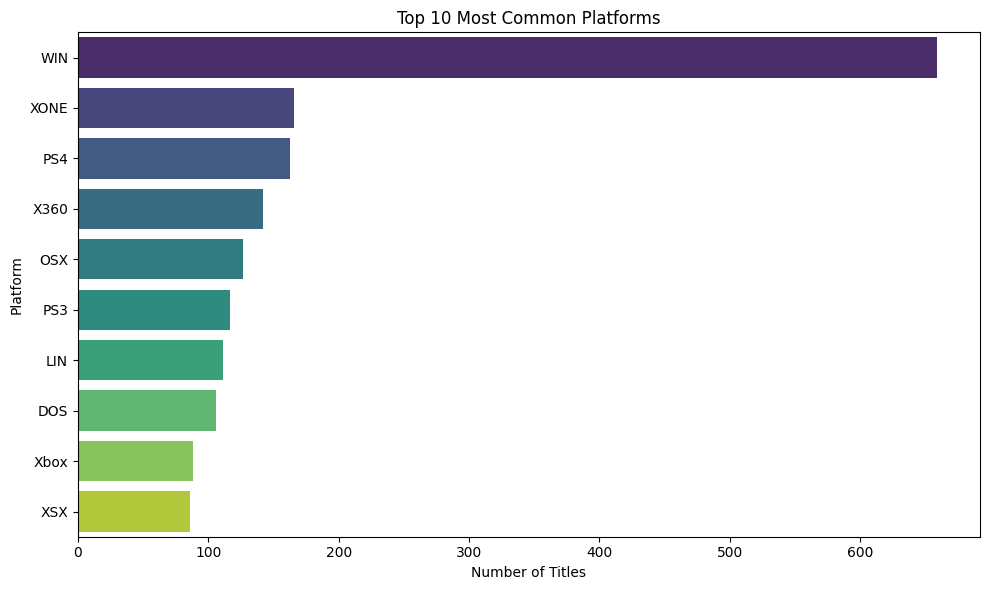

In [389]:
import seaborn as sns
import matplotlib.pyplot as plt

platform_counts = df_ex['Platform_List'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='viridis')
plt.title('Top 10 Most Common Platforms')
plt.xlabel('Number of Titles')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


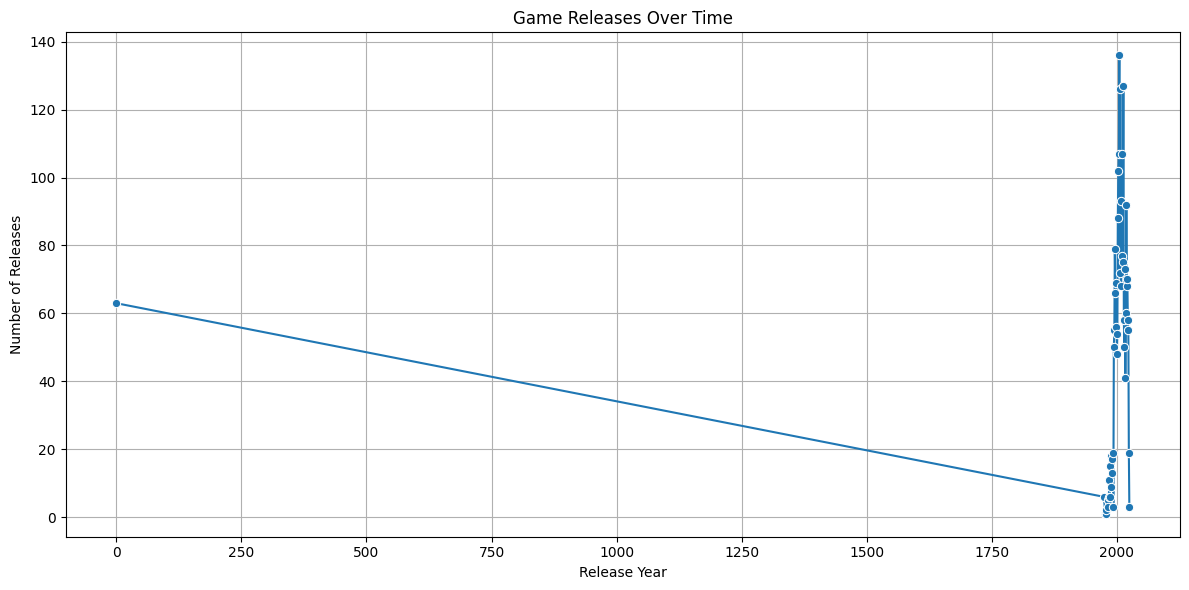

In [390]:
release_counts = df_ex.groupby('Release_Year')['Title'].count()

plt.figure(figsize=(12,6))
sns.lineplot(x=release_counts.index, y=release_counts.values, marker='o')
plt.title('Game Releases Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.tight_layout()
plt.show()


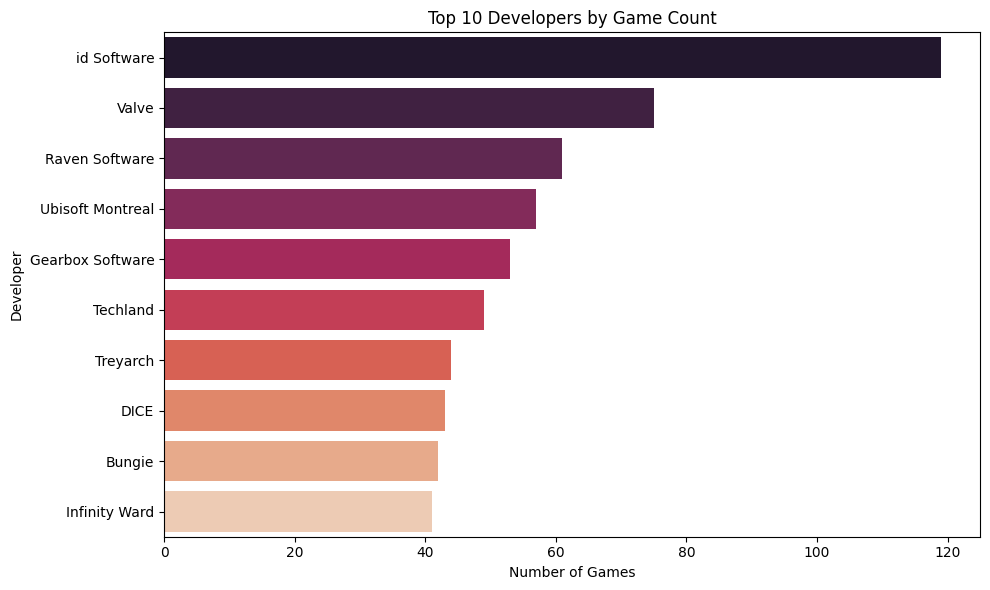

In [391]:
dev_counts = df_ex['Developer_List'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=dev_counts.values, y=dev_counts.index, palette='rocket')
plt.title('Top 10 Developers by Game Count')
plt.xlabel('Number of Games')
plt.ylabel('Developer')
plt.tight_layout()
plt.show()


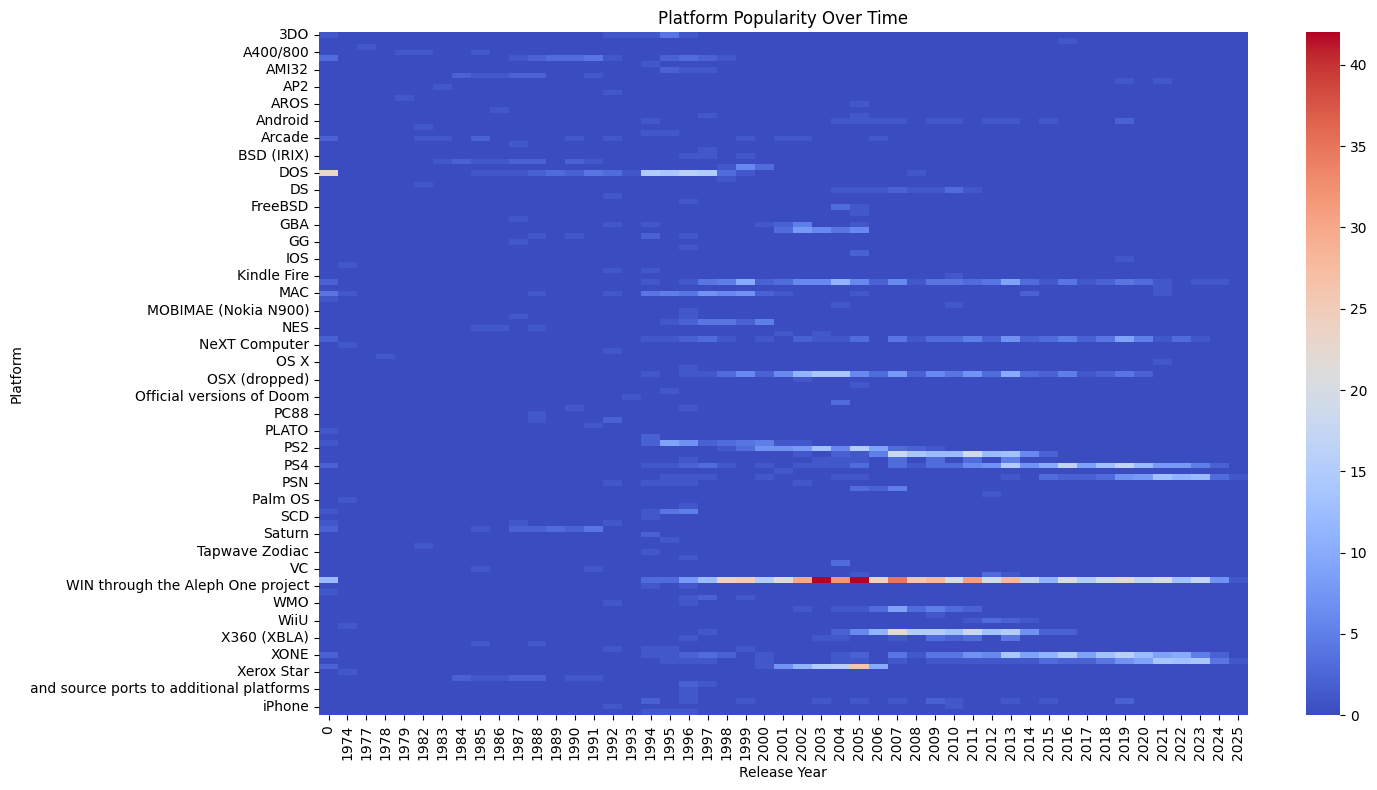

In [392]:
heatmap_data = df_ex.pivot_table(index='Platform_List', columns='Release_Year', values='Title', aggfunc='count').fillna(0)

plt.figure(figsize=(15,8))
sns.heatmap(heatmap_data, cmap='coolwarm')
plt.title('Platform Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()


In [393]:
import plotly.express as px

fig = px.scatter(df_ex, x='Release_Year', y='Platform_List', color='Developer_List',
                 hover_data=['Title'], title='Platform Timeline Colored by Developer')
fig.update_layout(height=600)
fig.show()


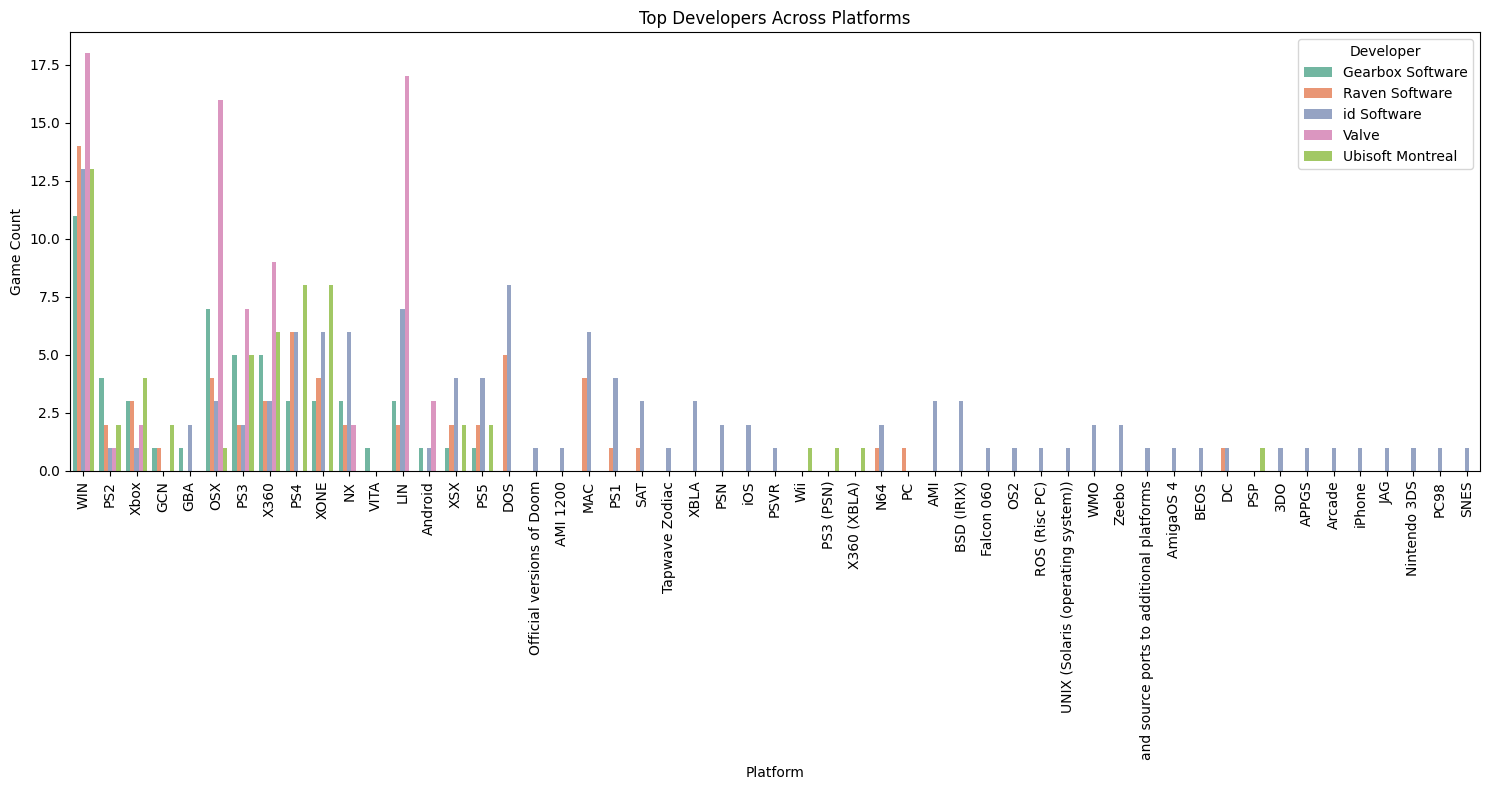

In [394]:
top_devs = df_ex['Developer_List'].value_counts().head(5).index
subset = df_ex[df_ex['Developer_List'].isin(top_devs)]

plt.figure(figsize=(15,8))
sns.countplot(data=subset, x='Platform_List', hue='Developer_List', palette='Set2')
plt.title('Top Developers Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Game Count')
plt.xticks(rotation=90)
plt.legend(title='Developer')
plt.tight_layout()
plt.show()

In [395]:
import plotly.express as px

platform_counts = df_ex['Platform_List'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Count']

fig = px.bar(platform_counts.head(15), x='Platform', y='Count',
             title='Top 15 Platforms by Game Count',
             text='Count', color='Platform')
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()
